<a href="https://colab.research.google.com/github/DURGABHAVANI66/TYPE-CHECKING-IN-C/blob/main/bank_customer_churn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#TITLE OF PROJECT
#                 ********* BANK CUSTOMER CHURN MODEL****************


In [ ]:

#Objective
#"To identify the bank customers who are going to leave/left the bank".
#In addition to that we will be knnowing on  how to do encoding ,feature scaling and handle the imbalance data . While handling imbalance data deals with the imbalance
# in sample in terms of label in the real world problems .This has 2 types i.e Random Under Sampling and Random over Sampling
#Support Vector Machine Classifier
#Grid Searcch for Hyperparameter Tunning



In [ ]:
#                              IMPORT LIBRARY
#                              Data Preprocessing
import pandas as pd #lib for preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#                             Import Data

df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

In [ ]:
#                            Data Functions
df.head()#13 variables y or target wew will be predicting



In [ ]:
#                                       Describe Data

In [ ]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
#Prediction
df.info()#10000 rows with 13 cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
df.duplicated("CustomerId").sum()# checking if  any duplicated

0

In [ ]:
df=df.set_index('CustomerId')#we are using cid as index using this function set_index

In [ ]:
df.info()

In [ ]:
#                                        ENCODING

In [ ]:
df['Geography'].value_counts()

In [ ]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)# here we are replacing the values of the keys fr,germ,spa with 2,1,0using the customer id as geography



In [ ]:
df['Gender'].value_counts()

In [ ]:

df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)#

In [ ]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [ ]:
df.replace({'Num Of Products':{1:0,2:1,3:1,4:1}},inplace=True)#we r not wasting the size

In [ ]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [ ]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [ ]:
df.loc[(df['Balance']==0),'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [ ]:
df['Zero Balance']=np.where(df['Balance']>0,1,0)

<Axes: >

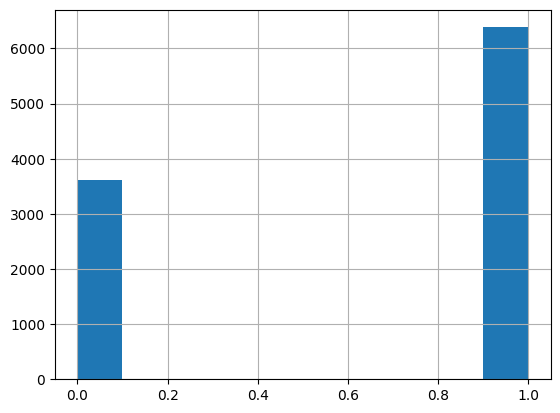

In [ ]:
df['Zero Balance'].hist()

In [ ]:
df.groupby(['Churn','Geography']).count()


In [ ]:
#                                    DEFINE LABEL AND FEATURES

In [ ]:
#                                    modelling  extracring data
df.columns

In [ ]:
#                                    Define Target Variable (y) and Feature Variables (X)

In [ ]:
X=df.drop(['Surname','Churn'], axis=1)

In [ ]:
y=df['Churn']#y=churn x=column axis

In [ ]:
X.shape,y.shape

((10000, 11), (10000,))

In [ ]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

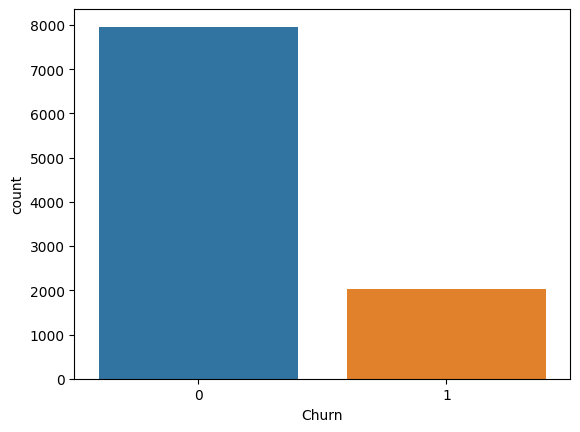

In [ ]:
sns.countplot(x='Churn',data=df)

In [ ]:
X.shape,y.shape

((10000, 11), (10000,))

In [ ]:
#                                     RANDOM UNDER SAMPLING

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus=RandomUnderSampler(random_state=2529)

In [ ]:
X_rus,y_rus=rus.fit_resample(X,y)

In [ ]:
X_rus.shape,y_rus.shape,X.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [ ]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [ ]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

In [ ]:
y_rus.plot(kind='hist')

In [ ]:
#RANDOMOVERSAMPLING

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros=RandomOverSampler(random_state=2529)

In [ ]:
X_ros, y_ros=ros.fit_resample(X,y)

In [ ]:
X_ros.shape,y_ros.shape,X.shape,y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [ ]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [ ]:
y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

In [ ]:
y_rus.plot(kind='hist')

In [ ]:
#                                  Train Test Split

#                                  Modeling

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#                                  SPLIT ORIGINAL DATA

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=25)

In [ ]:
#                                  SPLIT RANDOM UNDER SAMPLE DATA

In [ ]:
X_train_rus,X_test_rus,y_train_rus,y_test_rus=train_test_split(X_rus,y_rus,test_size=0.3,random_state=25)

In [ ]:
#                                  SPLIT RANDOM OVER SAMPLE DATA

In [ ]:
X_train_ros,X_test_ros,y_train_ros,y_test_ros=train_test_split(X_ros,y_ros,test_size=0.3,random_state=25)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
#                                  STANDARDIZE RANDOM UNDER SAMPLE DATA

In [ ]:
X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
#                                 STANDARDIZE RANDOM OVER SAMPLE DATA

In [ ]:
X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
#                               SUPPORT VECTOR MACHINE CLASSIFIER

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC()

In [ ]:
svc.fit(X_train,y_train)

SVC()

In [ ]:
#                                      Prediction

In [ ]:
y_pred=svc.predict(X_test)


In [ ]:

#                                    Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[2374,   45],
       [ 421,  160]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2419
           1       0.78      0.28      0.41       581

    accuracy                           0.84      3000
   macro avg       0.81      0.63      0.66      3000
weighted avg       0.84      0.84      0.81      3000



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'C':[0.1,1,10],
            'gamma':[1,0.1,0.01],
            'kernel':['rbf'],
            'class_weight':['balanced']}

In [ ]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv=2)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [ ]:
grid_predictions=grid.predict(X_test)


In [ ]:
confusion_matrix(y_test,grid_predictions)

array([[2166,  253],
       [ 365,  216]])

In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2419
           1       0.46      0.37      0.41       581

    accuracy                           0.79      3000
   macro avg       0.66      0.63      0.64      3000
weighted avg       0.78      0.79      0.79      3000



In [ ]:
svc_rus=SVC()

In [ ]:
svc_rus.fit(X_train_rus,y_train_rus)

SVC()

In [ ]:
y_pred_rus=svc_rus.predict(X_test_rus)

In [ ]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[248, 355],
       [157, 463]])

In [ ]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.61      0.41      0.49       603
           1       0.57      0.75      0.64       620

    accuracy                           0.58      1223
   macro avg       0.59      0.58      0.57      1223
weighted avg       0.59      0.58      0.57      1223



In [ ]:
param_grid={'C':[0.1,1,10],
            'gamma':[1,0.1,0.01],
            'kernel':['rbf'],
            'class_weight':['balanced']}

In [ ]:
grid_rus=GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv=2)
grid_rus.fit(X_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [ ]:
grid_predictions_rus=grid_rus.predict(X_test_rus)

In [ ]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[603,   0],
       [620,   0]])

In [ ]:
print(classification_report(y_test_rus,grid_predictions_rus))

In [ ]:
svc_ros=SVC()

In [ ]:
#Model Evaluation

In [ ]:
svc_ros.fit(X_train_ros,y_train_ros)

SVC()

In [ ]:
y_pred_ros=svc_ros.predict(X_test_ros)

In [ ]:
#                                    MODEL ACCURACY

In [ ]:
confusion_matrix(y_test_ros,y_pred_ros)

In [ ]:
print(classification_report(y_test_ros,y_pred_ros))

In [ ]:
#                                  HYPERPARAMETER TUNNING

In [ ]:
param_grid={'C':[0.1,1,10],
            'gamma':[1,0.1,0.01],
            'kernel':['rbf'],
            'class_weight':['balanced']}

In [ ]:
grid_ros=GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv=2)
grid_ros.fit(X_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.6s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [ ]:
grid_predictions_ros=grid_ros.predict(X_test_ros)

In [ ]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[2064,  362],
       [  75, 2277]])

In [ ]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2426
           1       0.86      0.97      0.91      2352

    accuracy                           0.91      4778
   macro avg       0.91      0.91      0.91      4778
weighted avg       0.91      0.91      0.91      4778



In [ ]:
print(classification_report(y_test ,y_pred ))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2419
           1       0.78      0.28      0.41       581

    accuracy                           0.84      3000
   macro avg       0.81      0.63      0.66      3000
weighted avg       0.84      0.84      0.81      3000



In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2419
           1       0.46      0.37      0.41       581

    accuracy                           0.79      3000
   macro avg       0.66      0.63      0.64      3000
weighted avg       0.78      0.79      0.79      3000



In [ ]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.61      0.41      0.49       603
           1       0.57      0.75      0.64       620

    accuracy                           0.58      1223
   macro avg       0.59      0.58      0.57      1223
weighted avg       0.59      0.58      0.57      1223



In [ ]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66       603
           1       0.00      0.00      0.00       620

    accuracy                           0.49      1223
   macro avg       0.25      0.50      0.33      1223
weighted avg       0.24      0.49      0.33      1223



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      2426
           1       0.76      0.77      0.76      2352

    accuracy                           0.76      4778
   macro avg       0.76      0.76      0.76      4778
weighted avg       0.77      0.76      0.76      4778



In [ ]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2426
           1       0.86      0.97      0.91      2352

    accuracy                           0.91      4778
   macro avg       0.91      0.91      0.91      4778
weighted avg       0.91      0.91      0.91      4778

